In [1]:
import keras
keras.__version__

Using TensorFlow backend.


'2.0.8'

There are two ways to obtain word embeddings:

1. Learn word embeddings jointly with the main task you care about (e.g. document classification or sentiment prediction). In this setup, you would start with random word vectors, then learn your word vectors in the same way that you learn the weights of a neural network.
2. Load into your model word embeddings that were pre-computed using a different machine learning task than the one you are trying to solve. These are called "pre-trained word embeddings".

# Learning word embeddings with the Embedding layer

In [2]:
from keras.layers import Embedding

In [3]:
# the embedding layer takes at least two arguments
# the number of possible tokens, here (1000) (1+maximum word index)
# and the dimensionality of the embeddings, here 64
embedding_layer = Embedding(1000, 64)

- The Embedding layer is best understood as a dictionary mapping integer indices (which stand for specific words) to dense vectors.
- The Embedding layer takes as input a 2D tensor of integers, of shape (samples, sequence_length), where each entry is a sequence of integers
- It can embed sequences of variable lengths
- All sequences in a batach must have the same length
- This layer returns a 3D floating tensor, of shape (samples, sequence_length, embedding_dimensionality)

# IMDB movie review sentiment prediciton task

In [4]:
from keras.datasets import imdb
from keras import preprocessing

In [5]:
# number of words to consider as features
max_features = 10000
# cut texts after this number of words
maxlen = 20

In [6]:
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words = max_features)

In [7]:
X_train.shape

(25000,)

In [9]:
X_train[:1,]

array([ list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32])], dtype=object)

In [10]:
# this turns our lists of integers into a 2D integer tensor of shape (samples, maxlen)
X_train = preprocessing.sequence.pad_sequences(X_train, maxlen = maxlen)
X_test  = preprocessing.sequence.pad_sequences(X_test, maxlen = maxlen)

In [11]:
?preprocessing.sequence.pad_sequences

In [12]:
X_train.shape

(25000, 20)

In [13]:
X_train

array([[  65,   16,   38, ...,   19,  178,   32],
       [  23,    4, 1690, ...,   16,  145,   95],
       [1352,   13,  191, ...,    7,  129,  113],
       ..., 
       [  11, 1818, 7561, ...,    4, 3586,    2],
       [  92,  401,  728, ...,   12,    9,   23],
       [ 764,   40,    4, ...,  204,  131,    9]], dtype=int32)

In [14]:
from keras.models import Sequential
from keras.layers import Flatten, Dense

In [15]:
model = Sequential()
model.add(Embedding(10000, 8, input_length = maxlen))
# our activations have shape (samples, maxlen, 8) now
model.add(Flatten())
# shape is (samples, maxlen*8)
model.add(Dense(1, activation = 'sigmoid'))
model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['acc'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 20, 8)             80000     
_________________________________________________________________
flatten_1 (Flatten)          (None, 160)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 161       
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________


In [16]:
history = model.fit(X_train, y_train,
                   epochs = 10, batch_size = 32, 
                   validation_split = 0.2, verbose = 2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
7s - loss: 0.6560 - acc: 0.6482 - val_loss: 0.5906 - val_acc: 0.7146
Epoch 2/10
2s - loss: 0.5189 - acc: 0.7595 - val_loss: 0.5117 - val_acc: 0.7364
Epoch 3/10
2s - loss: 0.4512 - acc: 0.7933 - val_loss: 0.4949 - val_acc: 0.7470
Epoch 4/10
2s - loss: 0.4190 - acc: 0.8069 - val_loss: 0.4905 - val_acc: 0.7538
Epoch 5/10
2s - loss: 0.3965 - acc: 0.8198 - val_loss: 0.4914 - val_acc: 0.7572
Epoch 6/10
2s - loss: 0.3784 - acc: 0.8311 - val_loss: 0.4953 - val_acc: 0.7594
Epoch 7/10
2s - loss: 0.3624 - acc: 0.8419 - val_loss: 0.5004 - val_acc: 0.7574
Epoch 8/10
2s - loss: 0.3474 - acc: 0.8484 - val_loss: 0.5058 - val_acc: 0.7572
Epoch 9/10
2s - loss: 0.3330 - acc: 0.8582 - val_loss: 0.5122 - val_acc: 0.7528
Epoch 10/10
2s - loss: 0.3194 - acc: 0.8669 - val_loss: 0.5183 - val_acc: 0.7554


# Using pre-trained word embeddings

## Download imdb raw data

In [17]:
import os

imdb_dir = './data/aclImdb'
train_dir = os.path.join(imdb_dir, 'train')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname))
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

In [18]:
labels[:5]

[0, 0, 0, 0, 0]

In [19]:
texts[:5]

["Like most comments I saw this film under the name of The Witching which is the reissue title. Apparently Necromancy which is the original is better but I doubt it.<br /><br />Most scenes of the witching still include most necromancy scenes and these are still bad. In many ways I think the added nudity of the witching at least added some entertainment value! But don't be fooled -there's only 3 scenes with nudity and it's of the people standing around variety. No diabolique rumpy pumpy involved!<br /><br />This movie is so inherently awful it's difficult to know what to criticise first. The dialogue is awful and straight out of the Troma locker. At least Troma is tongue in cheek though. This is straight-faced boredom personified. The acting is variable with Pamela Franklin (Flora the possessed kid in The Innocents would you believe!) the worst with her high-pitched screechy voice. Welles seems merely waiting for his pay cheque. The other female lead has a creepy face so I don't know wh

## Tokenize the data

In [20]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np

In [21]:
maxlen = 100  # We will cut reviews after 100 words
training_samples = 200  # We will be training on 200 samples
validation_samples = 10000  # We will be validating on 10000 samples
max_words = 10000  # We will only consider the top 10,000 words in the dataset

In [22]:
tokenizer = Tokenizer(num_words = max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

In [23]:
word_index = tokenizer.word_index
word_index

{'saville': 51592,
 'presumbably': 74074,
 "trent's": 26225,
 'poisen': 59411,
 'sadism': 14414,
 "'edward": 67715,
 'tenenbaums': 35075,
 'indulgences': 33913,
 'nicolie': 61259,
 'recognise': 10214,
 'macau': 71640,
 'stymied': 37804,
 'horatio': 20993,
 'opposes': 29640,
 'assuring': 38476,
 'shuttlecraft': 71523,
 'thinkthey': 67674,
 'avco': 29253,
 'dependency': 24977,
 'fluctuations': 44526,
 'sledging': 80681,
 'intervals': 13247,
 'bungled': 83200,
 'runmanian': 72664,
 'improvisationally': 53291,
 "eve'": 52222,
 'electromagnetic': 42271,
 'alex': 2359,
 'yds': 65901,
 'sondre': 40063,
 'inexperience': 16689,
 'throughing': 66809,
 'set': 267,
 'hume': 21585,
 "trompettos'": 56922,
 'adjuster': 87187,
 'caselli': 77349,
 'horrorfilm': 78017,
 "'una": 69737,
 'altaire': 48936,
 "dudley's": 69695,
 'cnd': 75906,
 'ebano': 65444,
 'srk': 19240,
 'stiff': 3446,
 'cfto': 38637,
 'different': 272,
 'extremes': 9702,
 'alotta': 82779,
 'trimester': 67024,
 "'nomads'": 54550,
 'tarza

In [24]:
data = pad_sequences(sequences, maxlen = maxlen)

In [25]:
labels = np.asarray(labels)
labels

array([0, 0, 0, ..., 1, 1, 1])

In [26]:
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

In [27]:
x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

## Pre-process the embeddings

In [28]:
glove_dir = './data/glove'

In [29]:
embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'))
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

Let's build an embedding matrix that we will be able to load into an embedding layer. It must be a matrix of shape (max_words, embedding_dim). Note that the index 0 is not supposed to stand for any word or token -- it's a placeholder.

In [30]:
embedding_dim = 100
embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < max_words:
        if embedding_vector is not None:
            # Words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedding_vector

## Define a model

In [31]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

In [32]:
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length = maxlen))
model.add(Flatten())
model.add(Dense(32, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_2 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


## Load the GloVe embeddings in the model

In [33]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

## Train and evaluate

In [34]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val),
                    verbose = 2)

Train on 200 samples, validate on 10000 samples
Epoch 1/10
0s - loss: 1.7629 - acc: 0.5000 - val_loss: 0.7055 - val_acc: 0.5126
Epoch 2/10
0s - loss: 0.5755 - acc: 0.6850 - val_loss: 0.7681 - val_acc: 0.5101
Epoch 3/10
0s - loss: 0.4750 - acc: 0.7850 - val_loss: 0.7484 - val_acc: 0.5158
Epoch 4/10
0s - loss: 0.4438 - acc: 0.8300 - val_loss: 0.6892 - val_acc: 0.5572
Epoch 5/10
0s - loss: 0.2569 - acc: 0.9900 - val_loss: 0.7687 - val_acc: 0.5286
Epoch 6/10
0s - loss: 0.1887 - acc: 0.9750 - val_loss: 1.1813 - val_acc: 0.5013
Epoch 7/10
0s - loss: 0.2346 - acc: 0.9050 - val_loss: 0.7167 - val_acc: 0.5708
Epoch 8/10
0s - loss: 0.0769 - acc: 1.0000 - val_loss: 1.2446 - val_acc: 0.5015
Epoch 9/10
0s - loss: 0.1679 - acc: 0.9550 - val_loss: 1.2608 - val_acc: 0.5084
Epoch 10/10
0s - loss: 0.0586 - acc: 0.9950 - val_loss: 0.8849 - val_acc: 0.5487


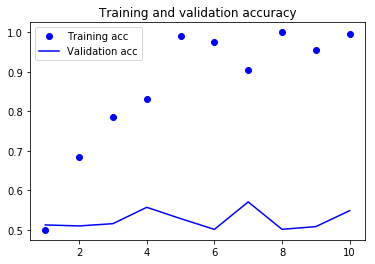

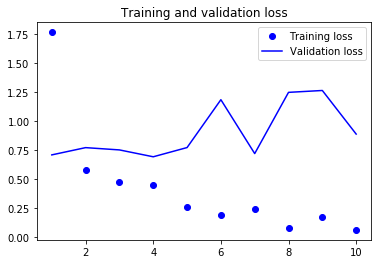

In [35]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()